In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('mental_health_data.csv')
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  50000 non-null  int64  
 1   Age                      50000 non-null  int64  
 2   Gender                   50000 non-null  object 
 3   Occupation               50000 non-null  object 
 4   Country                  50000 non-null  object 
 5   Mental_Health_Condition  50000 non-null  object 
 6   Severity                 24998 non-null  object 
 7   Consultation_History     50000 non-null  object 
 8   Stress_Level             50000 non-null  object 
 9   Sleep_Hours              50000 non-null  float64
 10  Work_Hours               50000 non-null  int64  
 11  Physical_Activity_Hours  50000 non-null  int64  
 12  Social_Media_Usage       50000 non-null  float64
 13  Diet_Quality             50000 non-null  object 
 14  Smoking_Habit         

In [18]:
df['Severity'] = df['Severity'].fillna('None')
df = df.drop('User_ID', axis=1)

print(df['Gender'].value_counts())
print(f"\n{df['Occupation'].value_counts()}")
print(f"\n{df['Country'].value_counts()}")
print(f"\n{df['Mental_Health_Condition'].value_counts()}")
print(f"\n{df['Severity'].value_counts()}")
print(f"\n{df['Consultation_History'].value_counts()}")
print(f"\n{df['Stress_Level'].value_counts()}")
print(f"\n{df['Diet_Quality'].value_counts()}")
print(f"\n{df['Smoking_Habit'].value_counts()}")
print(f"\n{df['Alcohol_Consumption'].value_counts()}")
print(f"\n{df['Medication_Usage'].value_counts()}")

Gender
Female               12633
Prefer not to say    12558
Male                 12473
Non-binary           12336
Name: count, dtype: int64

Occupation
Finance        7286
IT             7281
Other          7112
Healthcare     7105
Education      7089
Engineering    7072
Sales          7055
Name: count, dtype: int64

Country
India        7323
USA          7271
Germany      7156
Canada       7149
Other        7124
Australia    7014
UK           6963
Name: count, dtype: int64

Mental_Health_Condition
No     25003
Yes    24997
Name: count, dtype: int64

Severity
None      25002
Medium     8436
High       8301
Low        8261
Name: count, dtype: int64

Consultation_History
No     25110
Yes    24890
Name: count, dtype: int64

Stress_Level
Medium    16847
High      16707
Low       16446
Name: count, dtype: int64

Diet_Quality
Unhealthy    16729
Healthy      16638
Average      16633
Name: count, dtype: int64

Smoking_Habit
Non-Smoker           12580
Occasional Smoker    12556
Regular Smoker 

In [19]:
# --- 1. Numerical Features ---
# These are continuous or discrete numbers.
numerical_features = [
    'Age',
    'Sleep_Hours',
    'Work_Hours',
    'Physical_Activity_Hours',
    'Social_Media_Usage'
]

# --- 2. Ordinal Features (Order Matters) ---
# We must define the exact order for each of these features.
ordinal_features = [
    'Severity',
    'Stress_Level',
    'Diet_Quality',
    'Smoking_Habit',
    'Alcohol_Consumption'
]

# Define the explicit order for each ordinal feature
severity_order = ['None', 'Low', 'Medium', 'High']
stress_order = ['Low', 'Medium', 'High']
diet_order = ['Healthy', 'Average', 'Unhealthy']
smoking_order = ['Non-Smoker', 'Occasional Smoker', 'Regular Smoker', 'Heavy Smoker']
alcohol_order = ['Non-Drinker', 'Social Drinker', 'Regular Drinker', 'Heavy Drinker']

# --- 3. Nominal Features (Order Does Not Matter) ---
# These will be one-hot encoded. We are excluding 'Country'.
nominal_features = [
    'Gender',
    'Occupation',
    'Consultation_History',
    'Medication_Usage'
]

print("✅ Feature types identified successfully!")
print(f"Numerical: {numerical_features}")
print(f"Ordinal: {ordinal_features}")
print(f"Nominal: {nominal_features}")

✅ Feature types identified successfully!
Numerical: ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
Ordinal: ['Severity', 'Stress_Level', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']
Nominal: ['Gender', 'Occupation', 'Consultation_History', 'Medication_Usage']


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Define the transformers for each feature type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[severity_order, stress_order, diet_order, smoking_order, alcohol_order]), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features)
    ],
    remainder='drop'  # Drop columns not specified (like 'Country')
)

print("✅ Preprocessing pipeline created.")

✅ Preprocessing pipeline created.


In [22]:
from sklearn.model_selection import train_test_split

TARGET_COLUMN = 'Mental_Health_Condition'
# Convert the target variable 'Yes'/'No' to 1/0
df[TARGET_COLUMN] = df[TARGET_COLUMN].map({'Yes': 1, 'No': 0})

# Separate features (X) and target (y) from the dataframe
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Essential for balanced classes
)

# Fit the preprocessor on the training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed testing data: {X_test_processed.shape}")
print("\n✅ Data is preprocessed and ready for model training!")

Shape of processed training data: (40000, 25)
Shape of processed testing data: (10000, 25)

✅ Data is preprocessed and ready for model training!


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_processed,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_processed, y_test),
    callbacks=[early_stopping],
    verbose=1
)

d:\Projects\Final Year Project\Mental Health Trend\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5036 - loss: 0.7066 - val_accuracy: 0.4950 - val_loss: 0.6936
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5066 - loss: 0.6937 - val_accuracy: 0.4981 - val_loss: 0.6934
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5035 - loss: 0.6934 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5091 - loss: 0.6930 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5158 - loss: 0.6926 - val_accuracy: 0.4965 - val_loss: 0.6932
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5056 - loss: 0.6927 - val_accuracy: 0.5001 - val_loss: 0.6933
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5162 - loss: 0.6921 - val_accuracy: 0.5072 - val_loss: 0.6933
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5167 - loss: 0.6918 - val_accu

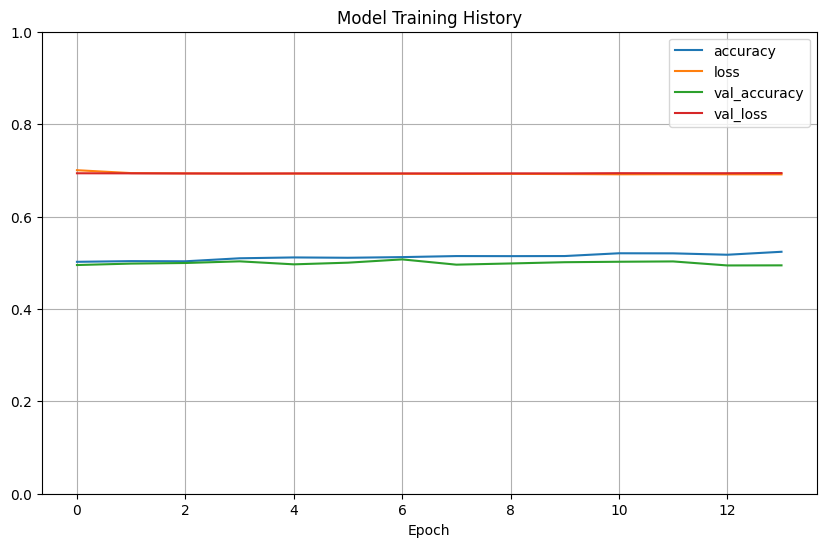

In [24]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the y-axis range to [0, 1] for better visualization
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5035 - loss: 0.6930

Final Test Accuracy: 50.30%
Final Test Loss: 0.6931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Classification Report ---
               precision    recall  f1-score   support

 No Condition       0.50      0.57      0.54      5001
Has Condition       0.50      0.43      0.47      4999

     accuracy                           0.50     10000
    macro avg       0.50      0.50      0.50     10000
 weighted avg       0.50      0.50      0.50     10000


--- Confusion Matrix ---


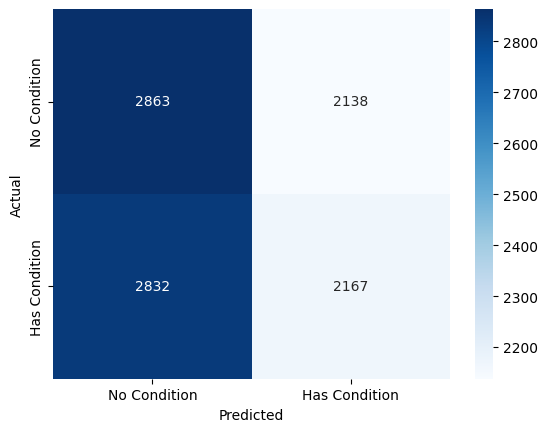

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")
print(f"Final Test Loss: {loss:.4f}")

# Generate predictions
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Display detailed performance metrics
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Condition', 'Has Condition']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Condition', 'Has Condition'], yticklabels=['No Condition', 'Has Condition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()